<a href="https://colab.research.google.com/github/SafwanaHussain/TestRepository-/blob/main/Boston_House_Prices_uni_variate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [16]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)



In [17]:
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### AS we see: MEDV     Median value of owner-occupied homes in $1000's

In [26]:
df = boston[['AGE', 'LSTAT']]

In [29]:
df.rename(columns = {'LSTAT':'LSP'}, inplace = True)

In [30]:
df

,AGE,LSP
0,65.2,4.98
1,78.9,9.14
2,61.1,4.03
3,45.8,2.94
4,54.2,5.33
...,...,...
501,69.1,9.67
502,76.7,9.08
503,91.0,5.64
504,89.3,6.48


In [31]:
df.describe()

,AGE,LSP
count,506.000000,506.000000
mean,68.574901,12.653063
std,28.148861,7.141062
min,2.900000,1.730000
25%,45.025000,6.950000
50%,77.500000,11.360000
75%,94.075000,16.955000
max,100.000000,37.970000


### Select the feature and target variables


##### In this example, we're using the "RM" variable (average number of rooms per dwelling) as the feature variable to predict the "PRICE" variable (house price).

In [39]:
X = df['AGE'].values.reshape(-1,1)  # average number of rooms per dwelling
y = df['LSP'].values.reshape(-1,1)

# Split the data into training and testing sets


In [40]:
X_train_AGE, X_test_AGE, y_train_LSP, y_test_LSP = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the linear regression model to the training data
lr_AGE = LinearRegression()
lr_AGE.fit(X_train_AGE, y_train_LSP)

LinearRegression()

In [44]:
# model evaluation for training set
y_train_pred_AGE = lr_AGE.predict(X_train_AGE)
rmse_train_AGE = (np.sqrt(mean_squared_error(y_train_LSP, y_train_pred_AGE)))
r2_train_AGE = r2_score(y_train_LSP, y_train_pred_AGE)
print("Performance of the model on Training Data (AGE)- RMSE : ",rmse_train_AGE)
print("Performance of the model on Training Data (AGE)- R2 score : ",r2_train_AGE)

Performance of the model on Training Data (AGE)- RMSE :  5.927773692023044
Performance of the model on Training Data (AGE)- R2 score :  0.3034069490843908


### Make predictions on the testing data


In [46]:
# model evaluation for training set
y_test_pred_AGE = lr_AGE.predict(X_test_AGE)
rmse_test_AGE = (np.sqrt(mean_squared_error(y_test_LSP, y_test_pred_AGE)))
r2_test_AGE = r2_score(y_test_LSP, y_test_pred_AGE)
print("Performance of the model on Training Data is RMSE : ",rmse_test_AGE)
print("Performance of the model on Training Data is R2 score : ",r2_test_AGE)

Performance of the model on Training Data is RMSE :  5.165320646468659
Performance of the model on Training Data is R2 score :  0.4821964538359189


### Calculate the root mean squared error (RMSE) and R-squared value of the model


In [50]:
rmse_test2_AGE = np.sqrt(np.mean((y_test_pred_AGE - y_test_LSP) ** 2))
print (rmse_test2_AGE)

5.165320646468659


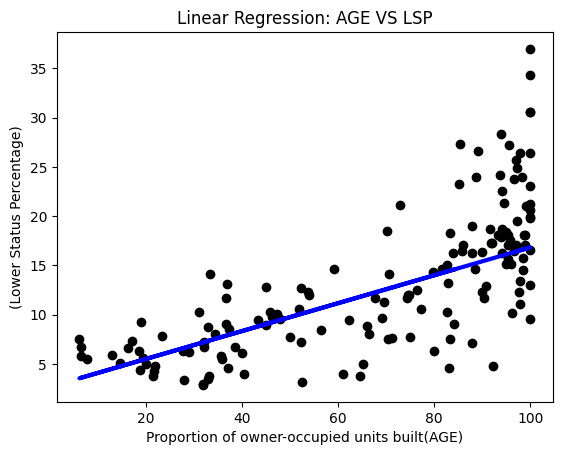

In [53]:
# Plot the regression line and scatterplot of the data
plt.scatter(X_test_AGE, y_test_LSP, color='black')
plt.plot(X_test_AGE, y_test_pred_AGE, color='blue', linewidth=3)
plt.xlabel('Proportion of owner-occupied units built(AGE)')
plt.ylabel('(Lower Status Percentage)')
plt.title('Linear Regression: AGE VS LSP')
plt.show()


In [56]:
# Print the model coefficients and performance metrics
print('Coefficients: \n', lr_AGE.coef_)
print('Intercept: \n', lr_AGE.intercept_)
print('Root Mean squared error: %.2f' % rmse_test_AGE)
print('R-squared value: %.2f' % r2_test_AGE)

Coefficients: 
 [[0.14160962]]
Intercept: 
 [2.67842808]
Root Mean squared error: 5.17
R-squared value: 0.48


In [57]:
formula_AGE_LSP = 'y = {:.2f}x + {:.2f}'.format(lr_AGE.coef_[0][0], lr_AGE.intercept_[0])
print('Linear regression formula(AGE AND LSP): ', formula_AGE_LSP)

Linear regression formula(AGE AND LSP):  y = 0.14x + 2.68
